1. Write a program to perform histogram equalization. 

2. Perform histogram matching by taking two images.

3. Write a program to perform smoothing on an image with averaging filters of size 3, 5, 9, 15 and 35. 

4.  Write a program to perform smoothing using a median filter of size 3 * 3.

5. Write a program for sharpening an image using Gradient operator.

6. Write a program to perform following operations for sharpening an image:
    Take an image 
    Apply Laplacian
    Obtain sharpen image by adding ‘a’ and ‘b’
7.  Write a program for sharpening an image using unsharp masking and highboost filtering. 

Note:  use your own image for test purpose.
Attached bone image can also be used for Q. no. 6

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Write a program to perform histogram equalization.

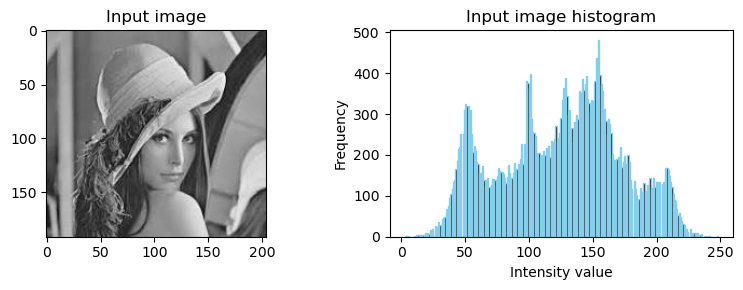

In [6]:
input_image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.tiff", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(input_image,cmap='gray')

plt.subplot(1,2,2)
plt.title("Input image histogram")
# matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
plt.hist(input_image.flatten(), bins=256, color='black', edgecolor='skyblue')
plt.xlabel("Intensity value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

2. Perform histogram matching by taking two images.

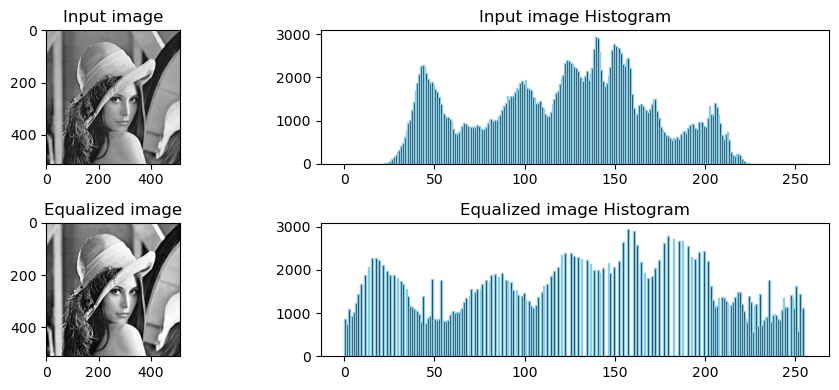

In [30]:
# Histogram equalization
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), 256,[0,256])
    #cummulative distributive function
    cdf=hist.cumsum()
    #cdf normalize
    cdf_normalized = (cdf-cdf.min())*255/(cdf.max()-cdf.min())
    
    # Round
    cdf_normalized = cdf_normalized.astype(np.uint8)
    
    # Equalized image
    equalized_image=cdf_normalized[image]
    
    return equalized_image

equalized_image = histogram_equalization(input_image)

plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.title("Input image")
plt.imshow(input_image, cmap='gray')

plt.subplot(2,2,2)
plt.title("Input image Histogram")
plt.hist(input_image.flatten(), 256, [0,256], color='black', edgecolor='skyblue')

plt.subplot(2,2,3)
plt.title("Equalized image")
plt.imshow(equalized_image,cmap='gray')

plt.subplot(2,2,4)
plt.title("Equalized image Histogram")
plt.hist(equalized_image.flatten(), 256, [0,256], color='black', edgecolor='skyblue' )

plt.tight_layout()
plt.show()

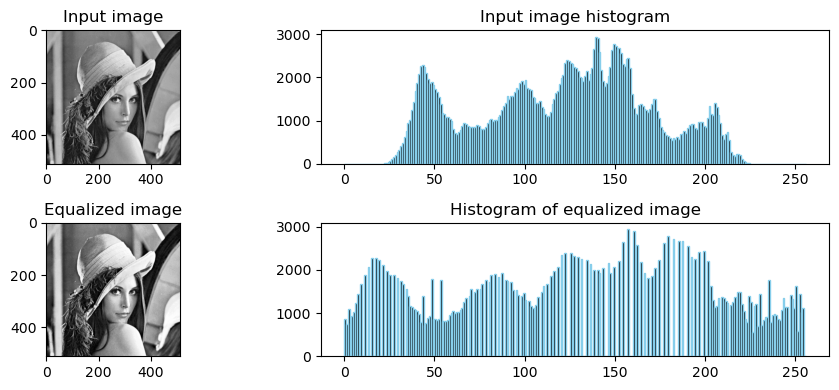

In [27]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

def hist_equalization(image):
    hist, bins = np.histogram(image.flatten(),255, [0,255])
    cdf = hist.cumsum()
    cdf_normalize = (cdf-cdf.min())*255/(cdf.max()-cdf.min())
    cdf_normalize = cdf_normalize.astype(np.uint8)
    equalized_image = cdf_normalize[image]
    return equalized_image

image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.jpg", cv2.IMREAD_GRAYSCALE)

equalized_image = hist_equalization(image)
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.title("Input image")
plt.imshow(image, cmap='gray')

plt.subplot(2,2,2)
plt.title("Input image histogram")
plt.hist(image.flatten(), 256, [0,256], color='black', edgecolor='skyblue')

plt.subplot(2,2,3)
plt.title("Equalized image")
plt.imshow(equalized_image, cmap='gray')

plt.subplot(2,2,4)
plt.title("Histogram of equalized image")
plt.hist(equalized_image.flatten(), 256, [0,256], color='black', edgecolor = 'skyblue')

plt.tight_layout()
plt.show()

3. Write a program to perform smoothing on an image with averaging filters of size 3, 5, 9, 15 and 35.

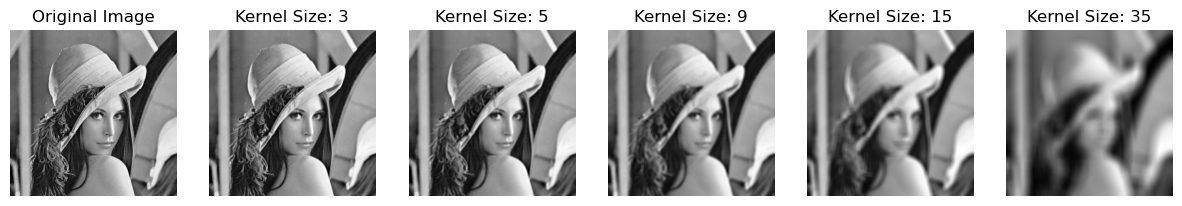

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_averaging_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
    smoothed_image = cv2.filter2D(image, -1, kernel)
    return smoothed_image

# Load the image
image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\Lenna.jpg")

# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Smoothing with different kernel sizes
kernel_sizes = [3, 5, 9, 15, 35]
smoothed_images = []

for kernel_size in kernel_sizes:
    smoothed_image = apply_averaging_filter(gray_image, kernel_size)
    smoothed_images.append(smoothed_image)

# Display original and smoothed images
plt.figure(figsize=(15, 5))
plt.subplot(1, len(kernel_sizes) + 1, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap = 'gray')
plt.axis('off')

for i, kernel_size in enumerate(kernel_sizes):
    plt.subplot(1, len(kernel_sizes) + 1, i + 2)
    plt.title("Kernel Size: " + str(kernel_size))
    plt.imshow(smoothed_images[i], cmap='gray')
    plt.axis('off')

plt.show()


4. Write a program to perform smoothing using a median filter of size 3 * 3.

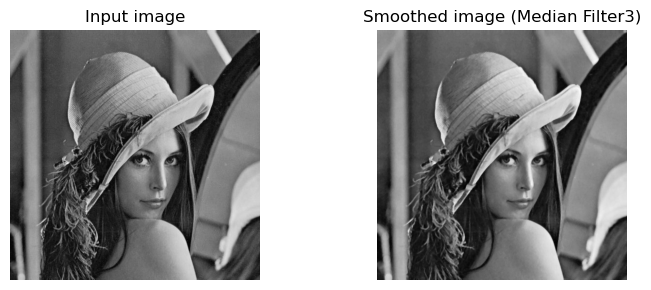

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def median_filter(image, kernel_size):
    # Pad the image to handle borders
    padded_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_REPLICATE)
    
    # Create an empty output image
    output_image = np.zeros_like(image)
    
    # Apply median filter
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            # Extract the region around the current pixel
            region = padded_image[y:y+kernel_size, x:x+kernel_size]
            # Compute the median of the region and assign it to the output pixel
            output_image[y, x] = np.median(region)
            
    return output_image
    
# Load grayscale image
input_image = cv2.imread(r"C:\Users\HP\Desktop\DIPLAB\Testimage\LennaGrayscale.jpg", cv2.IMREAD_GRAYSCALE)

# Apply median filter
kernel_size = 3
smoothed_image = median_filter(input_image, kernel_size)

# Display the original image and smoothed image
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title("Input image")
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Smoothed image (Median Filter{})'.format(kernel_size))
plt.imshow(smoothed_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


5. Write a program for sharpening an image using Gradient operator.

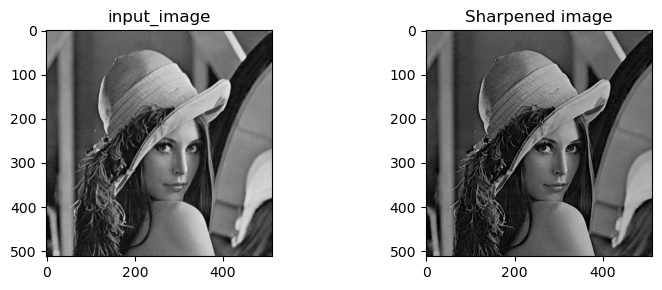

In [14]:
def sobel_operator(image):
    # Define Sobel kernels for gradient calculation in x and y directions
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    
    sobel_y = np.array([[-1, -2, 1],
                       [0, 0, 0],
                       [1, 2, 1]])
    
    # Convolve image with Sobel kernels to compute gradients
    gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    
    return gradient_x, gradient_y

# Apply Sobel operator to calculate gradient in x and y directions
gradient_x, gradient_y = sobel_operator(input_image)

# Combine gradients to get the overall gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Scale the gradient magnitude to 0-255
gradient_magnitude_scaled = np.uint8(255*(gradient_magnitude / np.max(gradient_magnitude)))

# Add the gradient magnitude to the original image to sharpen it
sharpened_iamge = cv2.addWeighted(input_image, 1, gradient_magnitude_scaled, -0.5, 0)

# Display
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('input_image')
plt.imshow(input_image, cmap='gray')

plt.subplot(1,2,2)
plt.title('Sharpened image')
plt.imshow(sharpened_iamge, cmap='gray')

plt.tight_layout()
plt.show()

6. Write a program to perform following operations for sharpening an image: Take an image Apply Laplacian Obtain sharpen image by adding ‘a’ and ‘b’

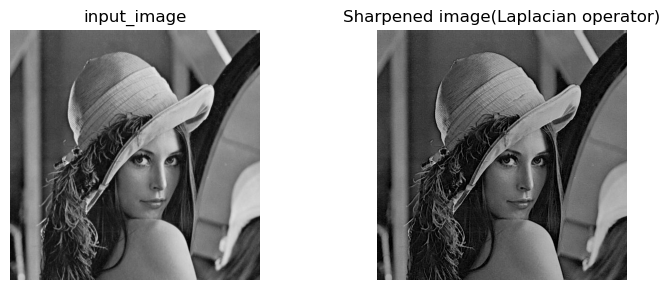

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def convolution(image, kernel):
    return cv2.filter2D(image, -1, kernel)

# Function to perform Laplacian operation
def laplacian_operator(image):
    laplacian_kernal = np.array([[0, -1, 0],
                                [-1, 4, -1],
                                [0, -1, 0]], dtype = np.float32)
    # Perform convolution 
    laplacian_result = convolution(image, laplacian_kernal)
    
    return laplacian_result

# Function to perform image sharpening using Laplacian operator
def sharpen_image_laplacian(image, a=1, b=0):
    # Apply laplacian operator
    laplacian = laplacian_operator(image)
    
    # Convert laplacian to the same data type as the input image
    laplacian = np.uint8(np.absolute(laplacian))
    
    # Add the Laplacian to the original image with scaling factors 'a' and 'b'
    sharpened_image = cv2.addWeighted(image, a, laplacian, b, 0)
    
    return sharpened_image
# Apply image sharpning using laplacian operator
sharpened_image = sharpen_image_laplacian(input_image, a=1.5, b=-0.5)

# Display
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.title('Input image')
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sharpened image(Laplacian operator)')
plt.imshow(sharpened_iamge, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()